In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [15]:
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform')

# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\tracks'

# List to store the individual DataFrames
dfs = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        #print(file_path)
        df = pd.read_csv(file_path, header = 2)
        df = df.drop(0)
        df.index = df.index -1    #Set the index rigth
        df = df.drop(columns='bodyparts')
        df_imputed_np= imputer_knn.fit_transform(df)
        df_imputed_final = pd.DataFrame(df_imputed_np, columns=df.columns)
        
        dfs.append(df_imputed_final)


C:\Users\raulo\AppData\Local\Temp\ipykernel_14676\3994089058.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_14676\3994089058.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_14676\3994089058.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppD

In [16]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\Labels'

# List to store the individual DataFrames
dfs_labels = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.drop(columns='Unnamed: 0')
        #print(file_path)
        dfs_labels.append(df)

In [17]:
#dfs_labels[0]

In [18]:
dfs_labels_single = []
for df in dfs_labels:
    # Convert DataFrame into a single-column DataFrame
    single_column_df = pd.DataFrame(df.idxmax(axis=1), columns=['Interaction'])
    dfs_labels_single.append(single_column_df)

In [19]:
# Create a list to store the labeled DataFrames
labeled_dfs = []

# Iterate over the DataFrames
for i in range(len(dfs)):
    # Add the labels DataFrame in front of each DataFrame
    labeled_df = pd.concat([dfs_labels_single[i], dfs[i]], axis=1)
    labeled_dfs.append(labeled_df)

# Concatenate the labeled DataFrames vertically
merged_df = pd.concat(labeled_dfs, ignore_index=True)

# Print the merged DataFrame
#print(merged_df)

In [20]:
interaction_counts = merged_df['Interaction'].value_counts()
print(interaction_counts)

background     594156
Int_Client       5524
TS               1474
Int_Cleaner       955
Jolt              490
Run               145
Name: Interaction, dtype: int64


# RandomForest (all Columns) with all backgrounds 600k

In [23]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1999)

In [26]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
#Accuracy: 0.9988220557615576

In [29]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9989630772548922


In [30]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#print(cm)

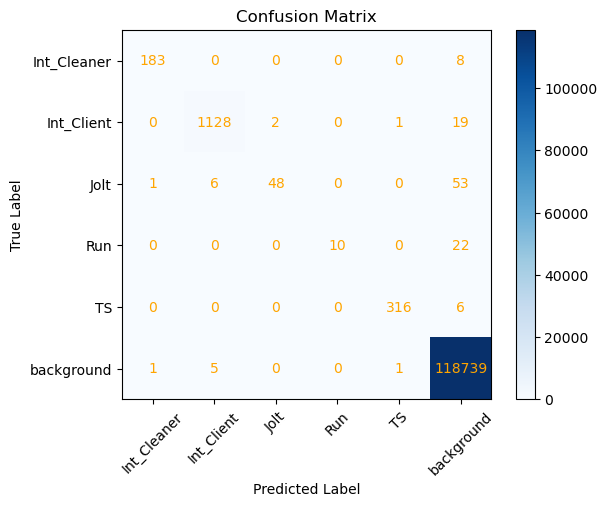

In [31]:
# Define the class labels
class_labels = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

---
---
---
---

# RandomForest (all Columns) with 5k backgrounds

In [32]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

In [33]:
background_df

,Interaction,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Spine_head,Client_Spine_head.1,Client_Spine_head.2,Client_Spine_tail,Client_Spine_tail.1,Client_Spine_tail.2,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
0,background,844.539,805.387,1.0,797.075,778.293,1.0,758.091,754.712,1.0,...,0.999,810.779,673.865,1.000,844.818,692.949,1.000,876.047,716.077,1.0
1,background,845.803,805.719,1.0,800.320,779.073,1.0,757.849,754.979,1.0,...,0.999,806.825,673.286,1.000,844.826,692.062,1.000,871.086,716.534,1.0
2,background,846.058,805.602,1.0,800.390,778.699,1.0,757.990,755.165,1.0,...,0.999,806.644,673.374,1.000,844.843,690.846,1.000,868.507,716.562,1.0
3,background,847.783,806.855,1.0,800.559,778.678,1.0,758.459,755.079,1.0,...,1.000,806.734,673.533,1.000,844.724,690.025,1.000,871.065,711.097,1.0
4,background,848.311,806.531,1.0,801.088,779.173,1.0,757.800,755.380,1.0,...,1.000,807.214,673.875,1.000,844.602,690.047,1.000,873.288,709.904,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602739,background,1263.867,974.489,1.0,1222.146,955.246,1.0,1174.693,938.989,1.0,...,0.945,731.627,549.341,0.993,770.119,580.529,0.991,811.584,625.064,1.0
602740,background,1263.782,974.429,1.0,1221.320,955.215,1.0,1175.633,939.109,1.0,...,0.998,732.121,555.723,0.997,770.471,580.947,0.995,811.741,624.951,1.0
602741,background,1263.192,975.049,1.0,1221.697,955.118,1.0,1176.165,939.093,1.0,...,1.000,732.213,555.825,0.998,770.811,581.112,0.996,811.713,624.362,1.0
602742,background,1262.779,975.279,1.0,1222.167,955.026,1.0,1180.271,939.323,1.0,...,1.000,732.091,555.704,0.997,771.701,581.695,0.997,811.827,620.278,1.0


In [34]:
desired_background_samples = 5000

background_sample = background_df.sample(n=desired_background_samples, random_state=1999)

In [35]:
background_sample

,Interaction,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Spine_head,Client_Spine_head.1,Client_Spine_head.2,Client_Spine_tail,Client_Spine_tail.1,Client_Spine_tail.2,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
166536,background,1922.216,1131.771,0.916,1923.274,1107.492,1.000,1890.262,1075.134,1.000,...,1.000,1266.5800,891.866,0.9990,1324.836,908.538,0.998,1372.690,939.640,1.000
40662,background,1173.446,685.651,1.000,1125.100,638.311,1.000,1068.936,609.681,1.000,...,1.000,821.6700,780.430,1.0000,770.806,765.171,0.999,726.150,757.911,1.000
108645,background,1542.900,876.958,1.000,1521.660,845.795,1.000,1483.487,818.499,1.000,...,0.948,748.2990,341.141,0.9860,709.394,373.014,0.998,684.490,411.305,0.999
576546,background,1664.154,1012.948,1.000,1658.614,978.015,0.995,1684.045,961.843,0.514,...,0.982,2083.7720,515.151,0.9950,2067.807,557.481,0.996,2075.746,611.987,1.000
372214,background,1542.252,972.999,1.000,1491.065,926.490,1.000,1427.622,892.563,1.000,...,1.000,1339.3000,468.867,0.9990,1298.898,499.964,0.999,1251.360,518.120,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313645,background,894.196,757.241,1.000,931.008,762.949,1.000,972.265,794.329,0.999,...,1.000,1499.0770,852.981,1.0000,1527.708,866.176,1.000,1546.775,887.338,1.000
473492,background,1010.694,979.469,1.000,1003.664,940.272,0.999,994.625,919.381,1.000,...,0.180,609.0734,979.562,0.1458,636.734,977.726,0.997,683.414,979.345,1.000
58468,background,1138.821,747.218,1.000,1116.026,709.508,1.000,1085.977,672.506,1.000,...,1.000,1291.7780,764.690,0.9990,1341.253,797.290,1.000,1375.716,828.795,1.000
195556,background,684.205,1132.196,0.112,667.230,1058.793,0.999,684.386,1052.178,0.991,...,1.000,723.1130,772.965,0.9400,651.997,818.445,0.970,667.836,859.901,1.000


In [36]:
undersampled_df = pd.concat([background_sample, other_df], ignore_index=True)

In [37]:
interaction_counts_new = undersampled_df['Interaction'].value_counts()
print(interaction_counts_new)

Int_Client     5524
background     5000
TS             1474
Int_Cleaner     955
Jolt            490
Run             145
Name: Interaction, dtype: int64


In [38]:
X_new5000 = undersampled_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_new5000 = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [39]:
X_new5000

,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Spine_head,Client_Spine_head.1,Client_Spine_head.2,Client_Spine_tail,Client_Spine_tail.1,Client_Spine_tail.2,Client_Body_top1,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
0,1922.216,1131.771,0.916,1923.274,1107.492,1.000,1890.262,1075.134,1.000,1924.766,...,1.000,1266.580,891.866,0.999,1324.836,908.538,0.998,1372.690,939.640,1.000
1,1173.446,685.651,1.000,1125.100,638.311,1.000,1068.936,609.681,1.000,1163.310,...,1.000,821.670,780.430,1.000,770.806,765.171,0.999,726.150,757.911,1.000
2,1542.900,876.958,1.000,1521.660,845.795,1.000,1483.487,818.499,1.000,1543.140,...,0.948,748.299,341.141,0.986,709.394,373.014,0.998,684.490,411.305,0.999
3,1664.154,1012.948,1.000,1658.614,978.015,0.995,1684.045,961.843,0.514,1659.824,...,0.982,2083.772,515.151,0.995,2067.807,557.481,0.996,2075.746,611.987,1.000
4,1542.252,972.999,1.000,1491.065,926.490,1.000,1427.622,892.563,1.000,1541.092,...,1.000,1339.300,468.867,0.999,1298.898,499.964,0.999,1251.360,518.120,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,1557.674,918.542,0.998,1542.004,900.728,0.999,1548.275,868.249,0.910,1547.009,...,1.000,1595.254,756.439,1.000,1628.689,773.326,0.999,1650.218,812.151,1.000
13584,1565.732,934.123,1.000,1546.351,906.044,0.998,1540.710,866.378,0.986,1555.752,...,1.000,1595.365,754.434,1.000,1628.539,770.899,1.000,1650.493,806.868,1.000
13585,1570.706,934.959,1.000,1546.797,907.055,0.999,1540.730,867.614,0.992,1563.867,...,1.000,1596.195,748.048,1.000,1628.661,769.174,1.000,1651.870,801.183,1.000
13586,1573.439,933.519,1.000,1547.071,907.504,1.000,1538.589,868.541,0.999,1563.724,...,1.000,1596.190,748.089,1.000,1628.663,768.311,1.000,1649.356,796.923,1.000


In [40]:
X_train_new5000, X_test_new5000, y_train_new5000, y_test_new5000 = train_test_split(X_new5000, y_new5000, test_size=0.2, random_state=1999)

In [41]:
model_new5000 = RandomForestClassifier()
model.fit(X_train_new5000, y_train_new5000)

RandomForestClassifier()

In [42]:
y_pred_new5000 = model.predict(X_test_new5000)
accuracy_new5000 = accuracy_score(y_test_new5000, y_pred_new5000)
print("Accuracy:", accuracy_new5000)

Accuracy: 0.9871228844738779


In [43]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000 = confusion_matrix(y_test_new5000, y_pred_new5000)

#print(cm_new5000)

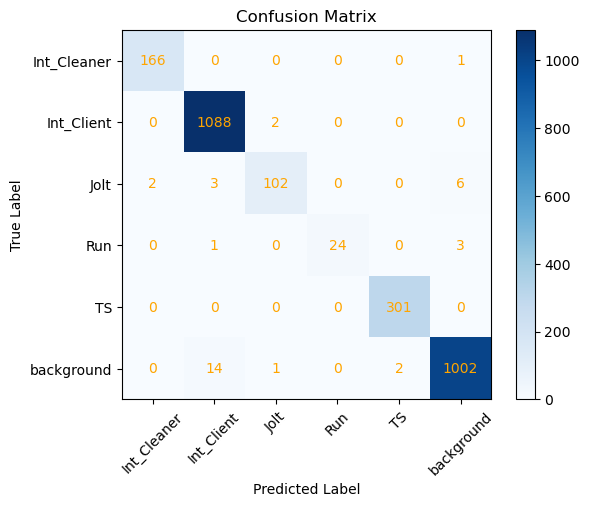

In [44]:
# Define the class labels
class_labels_new5000 = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000 = np.array(cm_new5000)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000)))
ax.set_yticks(np.arange(len(class_labels_new5000)))
ax.set_xticklabels(class_labels_new5000, rotation=45)
ax.set_yticklabels(class_labels_new5000)


# Add labels to each cell
for i in range(len(class_labels_new5000)):
    for j in range(len(class_labels_new5000)):
        text = ax.text(j, i, cm_new5000[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

---
---
---